In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, recall_score

In [2]:
df=pd.read_csv("final_mental_wellbeing.csv")

In [3]:
df.head()

,age,sleep_hours,screen_time_hours,water_intake,exercise_frequency,work_study_hours,break_frequency,multitasking,stress_level,social_time_hours,relationship_quality,hobbies,mental_wellbeing_score,data_source
0,20,7,5,4,I exercise almost every day,2,Sometimes,No,2,1,Good,Yes,7,Real
1,21,7,7,5,I exercise 1 to 2 days a week,3,Sometimes,Yes,4,2,Average,Yes,9,Real
2,20,8,8,3,I do not exercise at all,2,Often,Yes,4,2,Average,No,6,Real
3,20,10,8,6,I exercise almost every day,8,Often,Yes,5,6,Excellent,Yes,10,Real
4,20,8,3,6,I exercise almost every day,8,Sometimes,No,3,6,Excellent,Yes,10,Real


In [4]:
df = df.rename(columns={
    "What is your age?": "age",
    "How many hours do you usually sleep in a day?": "sleep_hours",
    "How many hours do you use a mobile, laptop or television in a day?": "screen_time_hours",
    "How many liters of water do you drink in a day?": "water_intake",
    "How often do you exercise in a week?": "exercise_frequency",
    "How many hours do you work or study in a day?": "work_study_hours",
    "How often do you take breaks while working or studying?": "break_frequency",
    "Do you usually do many tasks at the same time?": "multitasking",
    "How stressed do you feel on most days?": "stress_level",
    "How much time do you spend talking to friends or family in a day (in hours)?": "social_time_hours",
    "How would you describe your relationship with your family and friends?": "relationship_quality",
    "Do you spend time doing hobbies or activities you enjoy?": "hobbies",
    "How would you rate your overall mental well-being?": "mental_wellbeing_score",
    "Data_Source": "data_source"
})


In [5]:
df.head()

,age,sleep_hours,screen_time_hours,water_intake,exercise_frequency,work_study_hours,break_frequency,multitasking,stress_level,social_time_hours,relationship_quality,hobbies,mental_wellbeing_score,data_source
0,20,7,5,4,I exercise almost every day,2,Sometimes,No,2,1,Good,Yes,7,Real
1,21,7,7,5,I exercise 1 to 2 days a week,3,Sometimes,Yes,4,2,Average,Yes,9,Real
2,20,8,8,3,I do not exercise at all,2,Often,Yes,4,2,Average,No,6,Real
3,20,10,8,6,I exercise almost every day,8,Often,Yes,5,6,Excellent,Yes,10,Real
4,20,8,3,6,I exercise almost every day,8,Sometimes,No,3,6,Excellent,Yes,10,Real


In [6]:
df.shape

(4920, 14)

In [7]:
df.columns

Index(['age', 'sleep_hours', 'screen_time_hours', 'water_intake',
       'exercise_frequency', 'work_study_hours', 'break_frequency',
       'multitasking', 'stress_level', 'social_time_hours',
       'relationship_quality', 'hobbies', 'mental_wellbeing_score',
       'data_source'],
      dtype='object')

In [8]:
df.dtypes

age                        int64
sleep_hours                int64
screen_time_hours          int64
water_intake               int64
exercise_frequency        object
work_study_hours           int64
break_frequency           object
multitasking              object
stress_level               int64
social_time_hours          int64
relationship_quality      object
hobbies                   object
mental_wellbeing_score     int64
data_source               object
dtype: object

In [9]:
df.isnull().sum()

age                       0
sleep_hours               0
screen_time_hours         0
water_intake              0
exercise_frequency        0
work_study_hours          0
break_frequency           0
multitasking              0
stress_level              0
social_time_hours         0
relationship_quality      0
hobbies                   0
mental_wellbeing_score    0
data_source               0
dtype: int64

In [10]:
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    print(col, ":", df[col].unique())

exercise_frequency : ['I exercise almost every day' 'I exercise 1 to 2 days a week'
 'I do not exercise at all' 'I exercise 3 to 5 days a week']
break_frequency : ['Sometimes' 'Often' 'Rarely']
multitasking : ['No' 'Yes']
relationship_quality : ['Good' 'Average' 'Excellent' 'Poor']
hobbies : ['Yes' 'No']
data_source : ['Real' 'Synthetic']


In [11]:
df.describe()

,age,sleep_hours,screen_time_hours,water_intake,work_study_hours,stress_level,social_time_hours,mental_wellbeing_score
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,24.591463,5.471951,5.345935,3.197561,3.772154,3.105081,2.917886,5.205081
std,9.895786,2.066201,1.970778,1.148637,2.434655,1.303870,1.456060,2.656987
min,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,20.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,21.000000,6.000000,6.000000,3.000000,4.000000,3.000000,3.000000,5.000000
75%,23.000000,7.000000,7.000000,4.000000,5.000000,4.000000,4.000000,7.000000
max,69.000000,10.000000,10.000000,6.000000,8.000000,5.000000,6.000000,10.000000


In [12]:
# distribution of mental well-being score
df["mental_wellbeing_score"].value_counts().sort_index()

mental_wellbeing_score
1     474
2     537
3     472
4     502
5     651
6     620
7     680
8     314
9     310
10    360
Name: count, dtype: int64

In [13]:
def wellbeing_category(score):
    if score <= 4:
        return "Psychological Strain"
    elif score <= 7:
        return "Adaptive Coping"
    else:
        return "Psychological Flourishing"

df["wellbeing_class"] = df["mental_wellbeing_score"].apply(wellbeing_category)

In [14]:
df.head()

,age,sleep_hours,screen_time_hours,water_intake,exercise_frequency,work_study_hours,break_frequency,multitasking,stress_level,social_time_hours,relationship_quality,hobbies,mental_wellbeing_score,data_source,wellbeing_class
0,20,7,5,4,I exercise almost every day,2,Sometimes,No,2,1,Good,Yes,7,Real,Adaptive Coping
1,21,7,7,5,I exercise 1 to 2 days a week,3,Sometimes,Yes,4,2,Average,Yes,9,Real,Psychological Flourishing
2,20,8,8,3,I do not exercise at all,2,Often,Yes,4,2,Average,No,6,Real,Adaptive Coping
3,20,10,8,6,I exercise almost every day,8,Often,Yes,5,6,Excellent,Yes,10,Real,Psychological Flourishing
4,20,8,3,6,I exercise almost every day,8,Sometimes,No,3,6,Excellent,Yes,10,Real,Psychological Flourishing


In [15]:
df["wellbeing_class"].value_counts()

wellbeing_class
Psychological Strain         1985
Adaptive Coping              1951
Psychological Flourishing     984
Name: count, dtype: int64

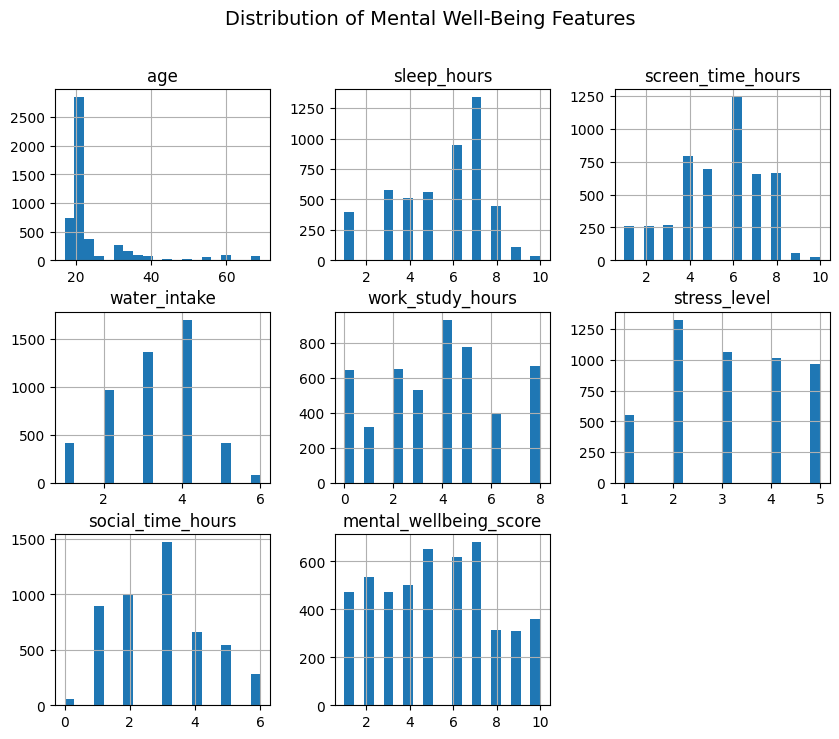

In [62]:
numeric_cols = ["age","sleep_hours","screen_time_hours","water_intake","work_study_hours","stress_level","social_time_hours","mental_wellbeing_score"]
df[numeric_cols].hist(figsize=(10, 8), bins=20)
plt.suptitle("Distribution of Mental Well-Being Features", fontsize=14)
plt.show()


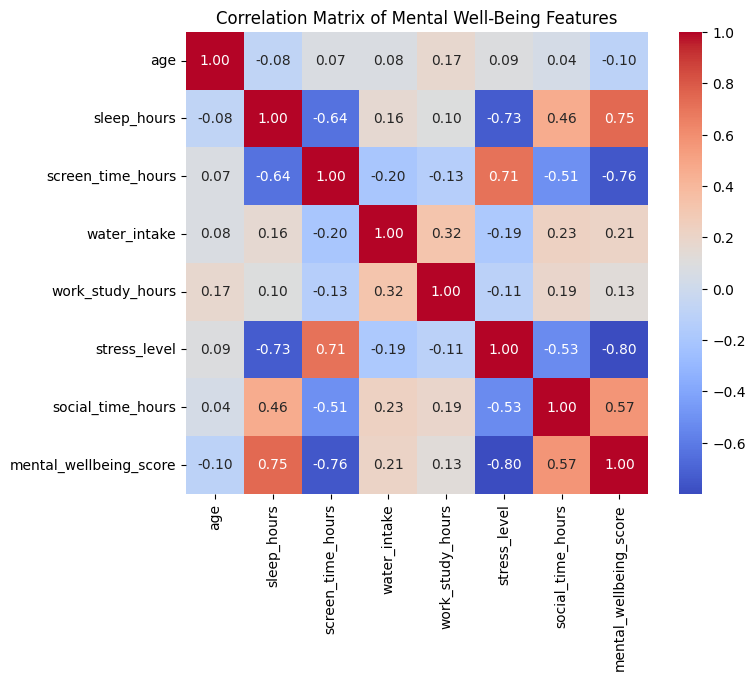

In [64]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",square=True)
plt.title("Correlation Matrix of Mental Well-Being Features")
plt.show()


In [18]:
X = df.drop(columns=["wellbeing_class", "mental_wellbeing_score","data_source"])
y = df["wellbeing_class"]

In [19]:
for col in ["hobbies", "multitasking", 
            "exercise_frequency", "break_frequency", 
            "relationship_quality"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [20]:
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

In [21]:
le_target.classes_

array(['Adaptive Coping', 'Psychological Flourishing',
       'Psychological Strain'], dtype=object)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=42,stratify=y_encoded)

In [23]:
lr_model = LogisticRegression(max_iter=1000,multi_class="auto",random_state=42)
lr_model.fit(X_train, y_train)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto', random_state=42)

In [24]:
y_pred_lr = lr_model.predict(X_test)

In [25]:
acc_lr = accuracy_score(y_test, y_pred_lr)
cm_lr=confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Accuracy:",acc_lr)
print("\nLogistic Regression Confusion Matrix",cm_lr)

Logistic Regression Accuracy: 0.9359756097560976

Logistic Regression Confusion Matrix [[369  15   6]
 [ 29 166   2]
 [  9   2 386]]


In [26]:
clr_lr=classification_report(y_test, y_pred_lr)
print("Classification report for Logistic regression:\n",clr_lr)

Classification report for Logistic regression:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       390
           1       0.91      0.84      0.87       197
           2       0.98      0.97      0.98       397

    accuracy                           0.94       984
   macro avg       0.93      0.92      0.93       984
weighted avg       0.94      0.94      0.94       984



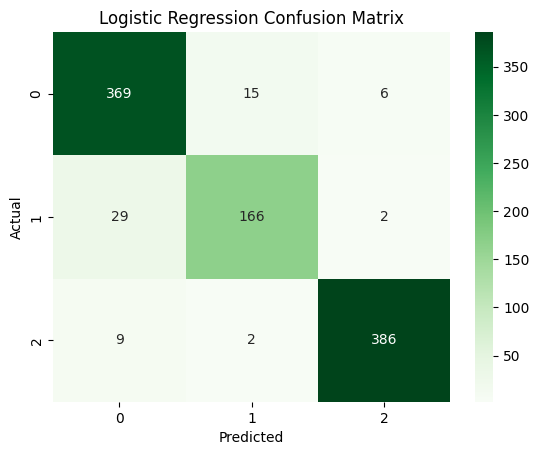

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [28]:
dt_model = DecisionTreeClassifier(random_state=42,max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [29]:
y_pred_dt=dt_model.predict(X_test)

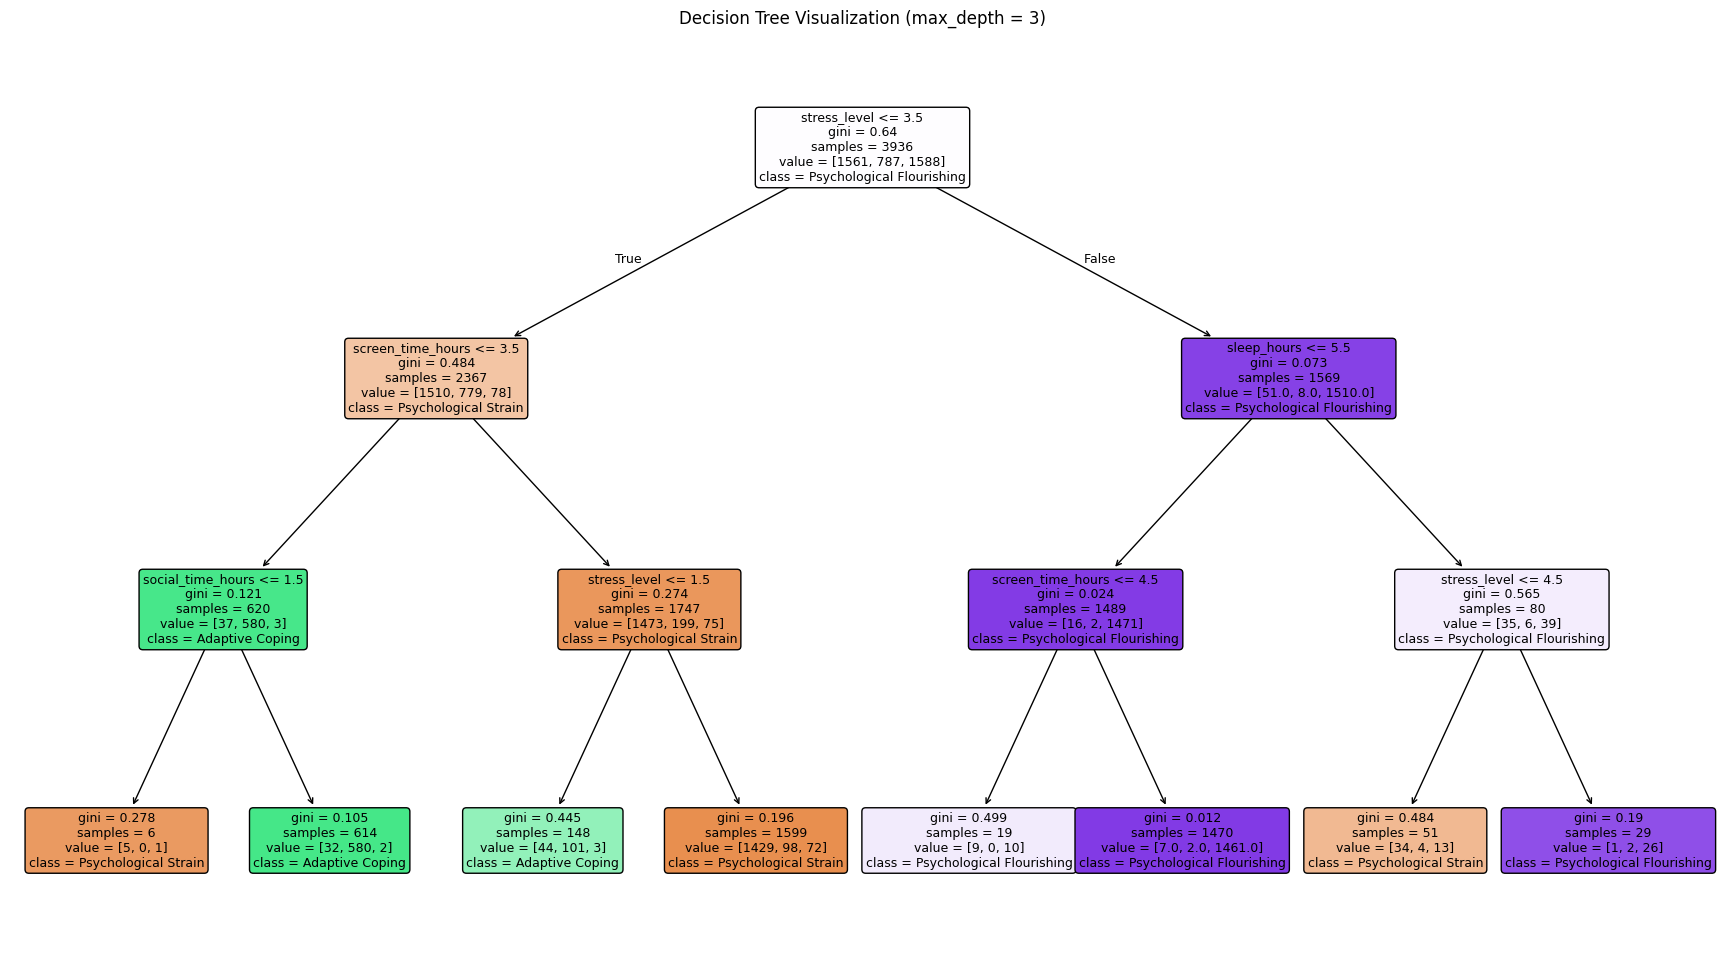

In [30]:
plt.figure(figsize=(22, 12))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=[
        "Psychological Strain",
        "Adaptive Coping",
        "Psychological Flourishing"
    ],
    filled=True,
    rounded=True
)

plt.title("Decision Tree Visualization (max_depth = 3)")
plt.show()


In [31]:
acc_dt = accuracy_score(y_test, y_pred_dt)
cm_dt=confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:",acc_dt)
print("\nDecision Tree Classifier Confusion Matrix:",cm_dt)

Decision Tree Classifier Accuracy: 0.9258130081300813

Decision Tree Classifier Confusion Matrix: [[361  22   7]
 [ 26 167   4]
 [ 12   2 383]]


In [32]:
clr_dt=classification_report(y_test, y_pred_dt)
print("Classification report for Decision Tree Classifier:\n",clr_dt)

Classification report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       390
           1       0.87      0.85      0.86       197
           2       0.97      0.96      0.97       397

    accuracy                           0.93       984
   macro avg       0.92      0.91      0.91       984
weighted avg       0.93      0.93      0.93       984



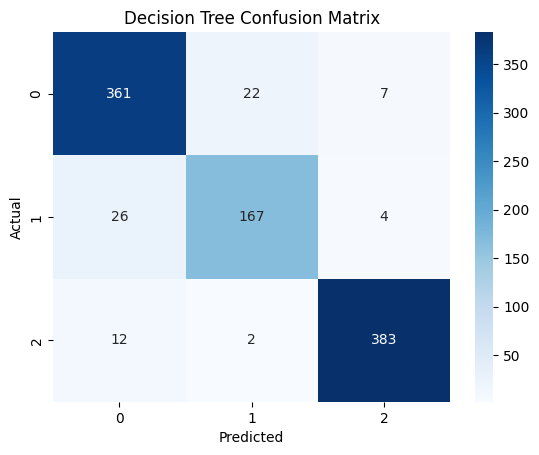

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [34]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=7)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [35]:
y_pred_rf = rf_model.predict(X_test)

In [36]:
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf=confusion_matrix(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy: ",acc_rf)
print("\nRandom Forest Classifier Confusion Matrix: ",acc_rf)

Random Forest Classifier Accuracy:  0.9583333333333334

Random Forest Classifier Confusion Matrix:  0.9583333333333334


In [37]:
clr_rf=classification_report(y_test, y_pred_rf)
print("Classification report for Random Forest Classifier:\n",clr_rf)

Classification report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       390
           1       0.93      0.91      0.92       197
           2       0.98      0.98      0.98       397

    accuracy                           0.96       984
   macro avg       0.95      0.95      0.95       984
weighted avg       0.96      0.96      0.96       984



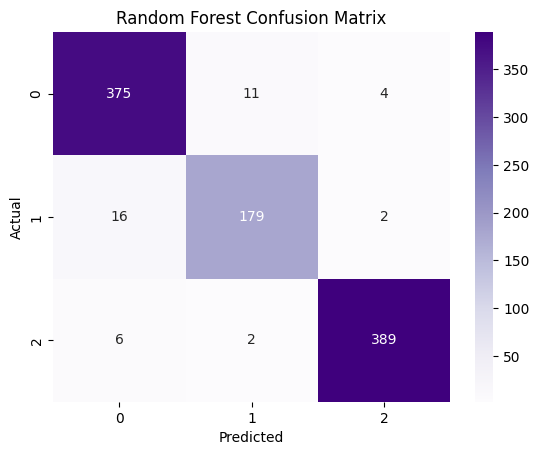

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [39]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
y_pred_knn = knn_model.predict(X_test)

In [41]:
acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn=confusion_matrix(y_test, y_pred_knn)
print("K Nearest Neighbor Accuracy: ",acc_knn)
print("\nK Nearest Neighbor Confusion Matrix: ",acc_knn)

K Nearest Neighbor Accuracy:  0.975609756097561

K Nearest Neighbor Confusion Matrix:  0.975609756097561


In [42]:
clr_knn=classification_report(y_test, y_pred_knn)
print("Classification report for K Nearest Neighbor:\n",clr_knn)

Classification report for K Nearest Neighbor:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       390
           1       0.98      0.92      0.95       197
           2       0.99      0.99      0.99       397

    accuracy                           0.98       984
   macro avg       0.98      0.97      0.97       984
weighted avg       0.98      0.98      0.98       984



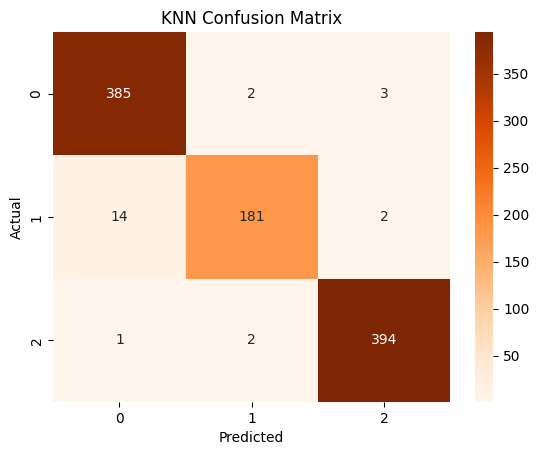

In [43]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()


In [44]:
f1_dt = f1_score(y_test, y_pred_dt, average="macro")
f1_lr = f1_score(y_test, y_pred_lr, average="macro")
f1_rf = f1_score(y_test, y_pred_rf, average="macro")
f1_knn = f1_score(y_test, y_pred_knn, average="macro")

In [49]:
acc_comparison_df = pd.DataFrame({"Model": ["Decision Tree","Logistic Regression","Random Forest","K Nearest Neighbor"],
    "Accuracy": [acc_dt,acc_lr,acc_rf,acc_knn]})
acc_comparison_df

,Model,Accuracy
0,Decision Tree,0.925813
1,Logistic Regression,0.935976
2,Random Forest,0.958333
3,K Nearest Neighbor,0.975610


In [48]:
prec_dt = precision_score(y_test, y_pred_dt,average="weighted")
rec_dt = recall_score(y_test, y_pred_dt,average="weighted")
f1_dt = f1_score(y_test, y_pred_dt,average="weighted")

prec_lr = precision_score(y_test, y_pred_lr, average="weighted")
rec_lr = recall_score(y_test, y_pred_lr, average="weighted")
f1_lr = f1_score(y_test, y_pred_lr, average="weighted")

prec_rf = precision_score(y_test, y_pred_rf, average="weighted")
rec_rf = recall_score(y_test, y_pred_rf, average="weighted")
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

prec_knn = precision_score(y_test, y_pred_knn, average="weighted")
rec_knn = recall_score(y_test, y_pred_knn, average="weighted")
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")

In [50]:
comparison_df = pd.DataFrame({
    "Model": ["Decision Tree","Logistic Regression","Random Forest","K Nearest Neighbor"],"Precision": [prec_dt, prec_lr, prec_rf, prec_knn],
    "Recall": [rec_dt, rec_lr, rec_rf, rec_knn],"F1 Score": [f1_dt, f1_lr, f1_rf, f1_knn]})
comparison_df

,Model,Precision,Recall,F1 Score
0,Decision Tree,0.925833,0.925813,0.925729
1,Logistic Regression,0.936205,0.935976,0.935680
2,Random Forest,0.958353,0.958333,0.958280
3,K Nearest Neighbor,0.975753,0.975610,0.975429


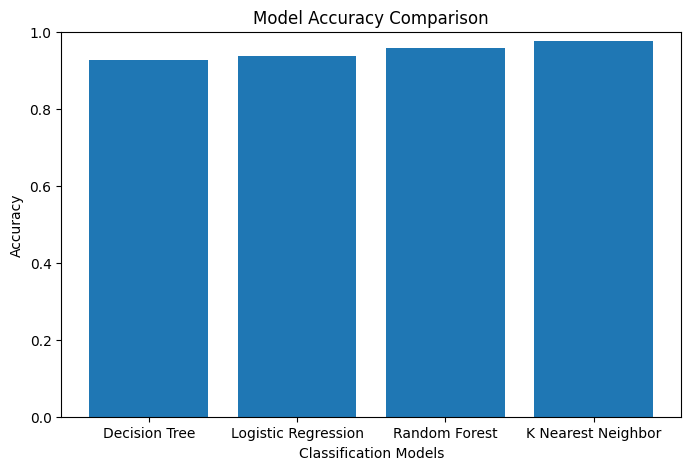

In [53]:
plt.figure(figsize=(8, 5))
plt.bar(acc_comparison_df["Model"], acc_comparison_df["Accuracy"])
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.show()


In [54]:
feature_importance = pd.Series(rf_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance

stress_level            0.305080
sleep_hours             0.300240
screen_time_hours       0.234599
social_time_hours       0.066634
relationship_quality    0.027096
age                     0.019730
work_study_hours        0.013652
water_intake            0.011194
exercise_frequency      0.006807
hobbies                 0.005522
break_frequency         0.004832
multitasking            0.004616
dtype: float64

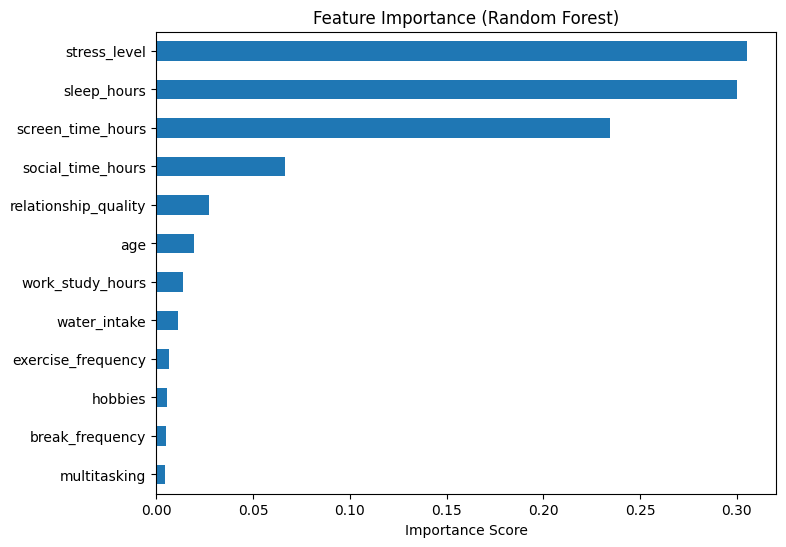

In [55]:
feature_importance.plot(kind="barh", figsize=(8, 6))
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [56]:
import pickle

pickle.dump(knn_model, open("knn_model.pkl", "wb"))